## Get The Dataset

In [34]:
from sklearn.datasets import fetch_20newsgroups,load_files
import re
import nltk
import gensim
import logging 
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
# ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 
#'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
#'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 
#'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 
#'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
# categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
time_start = time.time()
categories = ['alt.atheism','misc.forsale', 'rec.motorcycles', 'rec.sport.baseball']
filepath = r'C:\Users\happy\Desktop\LEMON\dataset'
newsgroups_train = fetch_20newsgroups(data_home=filepath,subset='train',categories=categories,remove=('headers'),random_state=100)
newsgroups_test = fetch_20newsgroups(data_home= filepath,subset='test',categories=categories,remove=('headers'),random_state=100)
# print(len(newsgroups_train.data),len(newsgroups_test.data))
print('Get the Dataset!')

Get the Dataset!


In [35]:
'''draw the bar of the number of Train and Test Documents'''
train_data_number = Counter()
for item in newsgroups_train.target:
            train_data_number[item] += 1

test_data_number = Counter()
for item in newsgroups_test.target:
    test_data_number[item] += 1 
train_data_number = [train_data_number[i] for i in range(len(categories))]
test_data_number = [test_data_number[i] for i in range(len(categories))]

index = np.arange(len(categories))
plt.xticks(index+0.15,categories)
plt.ylim([0,600])
bar_train = plt.bar(index,train_data_number,0.3,label='Training',color='g')
bar_test = plt.bar(index+0.3,test_data_number,0.3,label='Test',color='r')
plt.xlabel('Document name')
plt.ylabel('Document Number')
plt.title('The Number of Train and Test Data')
plt.legend()

In [36]:
'''find the outliter of the document ,the number of word less than 5 and more than 2000'''
doc_words_number = []
doc_list_word_less_than_5 = []
doc_list_word_more_than_2000 = []
for i in range(len(newsgroups_train.data)):
    word_number = len(newsgroups_train.data[i].split())
    doc_words_number.append(word_number)
    if word_number < 5:
        doc_list_word_less_than_5.append(i)
    if word_number > 2000:
        doc_list_word_more_than_2000.append(i)
print("There are %d documents that the number of word less than 5" % len(doc_list_word_less_than_5))
print("There are %d documents that the number of more than less than 2000" % len(doc_list_word_more_than_2000))
# print(len(doc_list_word_less_than_5),doc_list_word_less_than_5)
# print(len(doc_list_word_more_than_2000),doc_list_word_more_than_2000)
# print(len(doc_words_number))
# print(max(doc_words_number))
# print(min(doc_words_number))


There are 11 documents that the number of word less than 5
There are 9 documents that the number of more than less than 2000


In [37]:
'''Clean the outliter of the document'''

newsgroups_train_data = [newsgroups_train.data[i] for i in range(len(newsgroups_train.data)) if i not in doc_list_word_less_than_5 and i not in doc_list_word_more_than_2000]
newsgroups_train_target = np.array([newsgroups_train.target[i] for i in range(len(newsgroups_train.data)) if i not in doc_list_word_less_than_5 and i not in doc_list_word_more_than_2000])
# print(len(newsgroups_train_data))
# print(len(newsgroups_train_target),newsgroups_train_target.shape)

Text(0.5,1,'Histogram of the number of the word')

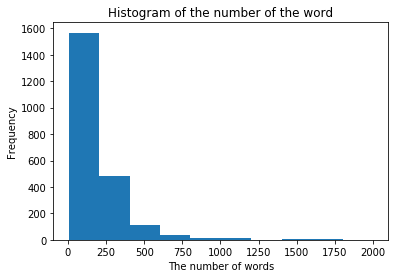

In [38]:
plt.hist(np.array(doc_words_number),range=(5,2000))
plt.xlabel('The number of words')
plt.ylabel('Frequency')
plt.title('Histogram of the number of the word')

## Get local corpus for the Word2Vec Model

In [39]:
english_punctuations = [',',':', ';','(', ')', '[', ']', '&','*','#', '$', '%','-',"<",">",'.','!','?']
newsgroups_train_cleand = []
newsgroups_test_cleand = []
all_train_sentences = ''
#clean up the pinctuations
def clean_punctuation(doc):
    '''clean up the pinctuations and digits'''
    new_doc =''
    doc = doc.replace('\n',' ')
    for punc in english_punctuations:
        doc = doc.replace(punc,'')
    doc = doc.strip().lower()
    for word in doc.split():
        if word.isalpha():
            new_doc += word + ' '
    return new_doc

for doc in newsgroups_train_data:
    doc_cleand_punctuation = clean_punctuation(doc)
    all_train_sentences += clean_punctuation(doc) + ' '

with open('local_info_for_all_sentcnces','w',encoding='utf-8') as f:
    f.write(all_train_sentences)
print("Write the sentences in the file!")


Write the sentences in the file!


## Train the Word2vec Model

In [40]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)
sentences = gensim.models.word2vec.Text8Corpus('local_info_for_all_sentcnces')

w2c_model = gensim.models.Word2Vec(sentences,size=100,seed = 10)
w2c_model.save("word2vec.model")
print('Training Word2Vec Success!')

2017-11-27 15:28:03,815 : INFO : collecting all words and their counts
2017-11-27 15:28:03,826 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-27 15:28:03,998 : INFO : collected 22371 word types from a corpus of 365138 raw words and 37 sentences
2017-11-27 15:28:03,999 : INFO : Loading a fresh vocabulary
2017-11-27 15:28:04,021 : INFO : min_count=5 retains 6310 unique words (28% of original 22371, drops 16061)
2017-11-27 15:28:04,022 : INFO : min_count=5 leaves 338589 word corpus (92% of original 365138, drops 26549)
2017-11-27 15:28:04,052 : INFO : deleting the raw counts dictionary of 22371 items
2017-11-27 15:28:04,054 : INFO : sample=0.001 downsamples 52 most-common words
2017-11-27 15:28:04,055 : INFO : downsampling leaves estimated 255513 word corpus (75.5% of prior 338589)
2017-11-27 15:28:04,056 : INFO : estimated required memory for 6310 words and 100 dimensions: 8203000 bytes
2017-11-27 15:28:04,082 : INFO : resetting layer weights
2017-11-2

Training Word2Vec Success!


## Processing the Train data and Test Data

In [41]:
newsgroups_train_cleand_text = []
newsgroups_test_cleand_text = []
stopwords_list = stopwords.words('english')
for doc in newsgroups_train_data:
    new_doc = clean_punctuation(doc)
    newsgroups_train_cleand_text.append(new_doc)
for doc in newsgroups_test.data:
    new_doc = clean_punctuation(doc)
    newsgroups_test_cleand_text.append(new_doc)

def clean_stopword_and_length_less_1(data):
    '''clear digits and the word that length less than 1 or some word like "aaaa" '''
    new_data_list = []
    new_data_str = []
    for doc in data:
        new_doc_list = []
        new_doc_str = ''
        for word in doc.split():
            if word not in stopwords_list and word.isalpha() and len(set(word)) > 2:
                new_doc_list.append(word)
                new_doc_str += word + ' ' 
        new_data_list.append(new_doc_list)
        new_data_str.append(new_doc_str)
    return new_data_list,new_data_str

#clean the digits and the word that length less than 1 ,and represent the DOC to the list of word
newsgroups_train_data_list,newsgroups_train_data_str = clean_stopword_and_length_less_1(newsgroups_train_cleand_text)
newsgroups_test_data_list ,newsgroups_test_data_str =  clean_stopword_and_length_less_1(newsgroups_test_cleand_text) 

all_words = Counter()
for doc in newsgroups_train_data_list:
    for word in doc:
            all_words[word]+=1
            
# print(len(all_words))
all_words={word:all_words[word] for word in all_words if 
       (all_words[word] > 2 and word in w2c_model.wv)}
print('There are %d valid words'%(len(all_words)))
# print(all_words.keys())

There are 5966 valid words


In [42]:
#去掉出现频次小于2 切不在word2Vec 预料库中的单词
def Clean_frequency_less_than_2(doclist):
    '''clear the frequency of the word less than 2 and the word don`t in word2vec'''
    data_str_new = []
    data_list_new = []
    for doc in doclist:
        new_doc = ''
        new_doc_list = []
        for word in doc.split():
            if word in all_words:
                new_doc += word + ' '
                new_doc_list.append(word)
        data_str_new.append(new_doc)
        data_list_new.append(new_doc_list)
    return data_list_new,data_str_new
newsgroups_train_data_list_new,newsgroups_train_data_str_new = Clean_frequency_less_than_2(newsgroups_train_data_str)
newsgroups_test_data_list_new,newsgroups_test_data_str_new = Clean_frequency_less_than_2(newsgroups_test_data_str)
print('Processing the Data Success!')

Processing the Data Success!


## Find the similarity word 

In [43]:
'''get the SimilarityList of each word '''
SimilarityList = {}
for word in all_words:
    similarity_word = w2c_model.wv.most_similar(word,topn=1)
#     print(similarity_word)
    if similarity_word[0][1] > 0.7 and len(set(similarity_word[0][0])) >2:
        #print(similarity_word[0][0])
        SimilarityList[word] = similarity_word[0]

print('Found the Similarity Word！')
# print(len(SimilarityList))
# for item in SimilarityList.values():
#     print(item[0])

2017-11-27 15:28:08,848 : INFO : precomputing L2-norms of word weight vectors


Found the Similarity Word！


## Use TF-IDF get the weight of the word 

In [44]:
'''use tf-idf calc the weight of the word  '''

vectorizer = CountVectorizer() 
transformer = TfidfTransformer()
tfidf_train_data = transformer.fit_transform(vectorizer.fit_transform(newsgroups_train_data_str_new))
word_train = vectorizer.get_feature_names() 
weight_train = tfidf_train_data.toarray()  
# print(word_train)

tfidf_test_data = transformer.fit_transform(vectorizer.fit_transform(newsgroups_test_data_str_new))
word_test = vectorizer.get_feature_names()
weight_test = tfidf_test_data.toarray()
# print(word_test)

## Find all word use for Distributed Representation

In [45]:
all_word_feature = []
for eachword in word_train:
    all_word_feature.append(eachword)
for eachword in SimilarityList:
    if SimilarityList[eachword][0] not in all_word_feature:
        all_word_feature.append(SimilarityList[eachword][0])
# print(all_word_feature)

## The algorithm of the Distributed Representation

In [46]:
def Word_Distributed_Representation(data,word_in_all_doc,weight):
    '''the algorithm change the word distributed presentation use the weight of the word and the similarity word'''
    weights_new = np.zeros((len(data),len(all_word_feature)))
    data_length = len(data)
    for i in range(data_length):
        doc_new = []
        for eachword in data[i]:
            if eachword not in doc_new:
                doc_new.append(eachword)
            weights_new[i][word_in_all_doc.index(eachword)] = weight[i][word_in_all_doc.index(eachword)]
            if eachword in SimilarityList:
                eachsimiword = SimilarityList[eachword]
                if eachsimiword[0] not in data[i]:
                    simiword_weight = weight[i][word_in_all_doc.index(eachword)] * eachsimiword[1]
                    if eachsimiword[0] not in doc_new and eachsimiword[0] in word_in_all_doc:
                        weights_new[i][all_word_feature.index(eachsimiword[0])] = simiword_weight
                        doc_new.append(eachsimiword[0])
                    if eachsimiword[0] in doc_new and weight[i][word_in_all_doc.index(eachword)] <= simiword_weight:
                        weights_new[i][all_word_feature.index(eachsimiword[0])] = simiword_weight
    return weights_new
print("Get the new Matrix")
weights_feature_train = Word_Distributed_Representation(newsgroups_train_data_list_new,word_train,weight_train)
print('Train Data Completed!')
weights_feature_test = Word_Distributed_Representation(newsgroups_test_data_list_new,word_test,weight_test)
print('Test Data Completed!')
print(weights_feature_train.shape)
print(weights_feature_test.shape)

Get the new Matrix
Train Data Completed!
Test Data Completed!
(2240, 6002)
(1504, 6002)


## Use SVM calssify the Document

In [47]:
C = [1]
kernel =['linear','poly','rbf','sigmoid']
t0 = time.time()
clf_svm = SVC(C=1,kernel='linear',random_state = 100)
clf_svm.fit(weights_feature_train,newsgroups_train_target)
pred_svm = clf_svm.predict(weights_feature_test)
t1 = time.time()
accuracy_svm = metrics.accuracy_score(newsgroups_test.target,pred_svm)
f1_score_svm = metrics.f1_score(newsgroups_test.target, pred_svm, average='macro')
time_svm = t1 - t0
print('The f1_score of LogisticRegression is',f1_score_svm)
print('The accuarcy of LogisticRegression is',accuracy_svm)
print('Time is ',time_svm)

The f1_score of LogisticRegression is 0.852543948266
The accuarcy of LogisticRegression is 0.854388297872
Time is  60.10558485984802


## Use LogisticRegression Classify the Document

In [48]:

t0 = time.time()
clf_log = LogisticRegression(random_state = 20)
clf_log.fit(weights_feature_train,newsgroups_train_target)
pred_log = clf_log.predict(weights_feature_test)
t1 = time.time()

accuary_log = metrics.accuracy_score(newsgroups_test.target,pred_log)
f1_score_log = metrics.f1_score(newsgroups_test.target, pred_log, average='macro')
time_log = t1 - t0
print('The f1_score of LogisticRegression is',f1_score_log)
print('The accuarcy of LogisticRegression is',accuary_log)
print('Time is ',time_log)

# TODO：初始化分类器




The f1_score of LogisticRegression is 0.876151113347
The accuarcy of LogisticRegression is 0.876329787234
Time is  0.32823634147644043


## Use MultinomialNB classify the Document

In [49]:
t0 = time.time()
clf_nb = MultinomialNB()
clf_nb.fit(weights_feature_train,newsgroups_train_target)
pred_nb = clf_nb.predict(weights_feature_test)
t1 = time.time()
accuary_nb = metrics.accuracy_score(newsgroups_test.target,pred_nb)
f1_score_nb = metrics.f1_score(newsgroups_test.target, pred_nb, average='macro')
time_nb = t1 - t0
print('The f1_score of LogisticRegression is',f1_score_nb)
print('The accuarcy of MultinomialNB classifier is ',accuary_nb)
print('Time is ',time_nb)

The f1_score of LogisticRegression is 0.871325055073
The accuarcy of MultinomialNB classifier is  0.871010638298
Time is  0.19614791870117188


In [50]:
accuarcy = [accuracy_svm,accuary_log,accuary_nb]
plt.figure('Accuracy')
index = np.arange(len(accuarcy))
plt.xticks([1,2,3],['SVM','LG','NB'])
plt.ylim([0,1])
bar_accuary = plt.bar([1,2,3],accuarcy,0.3,color='r')
plt.xlabel('Classifier Name')
plt.ylabel('Accuary')
plt.title('The accuary of classifier')
plt.figure('F1_score')
f1_score = [f1_score_svm,f1_score_log,f1_score_nb]
index = np.arange(len(f1_score))
plt.xticks([1,2,3],['SVM','LG','NB'])
plt.ylim([0,1])
bar_accuary = plt.bar([1,2,3],accuarcy,0.3,color='g')
plt.xlabel('Classifier Name')
plt.ylabel('F1_score')
plt.title('The F1_score of classifier')

plt.figure('Time')
time_list = [time_svm,time_log,time_nb]
index = np.arange(len(time_list))
plt.xticks(index+0.15,['SVM','LG','NB'])
plt.ylim([0,30])
bar_time = plt.bar(index,time_list,0.3,color='b')
plt.xlabel('Classifier Name')
plt.ylabel('Time')
plt.title('The Time of classifier')


Text(0.5,1,'The Time of classifier')

## Refinement

In [51]:
'''refinement for the logistic regression'''
accuarcy_list = []
Training_list = []
for c in [0.1,1,10,100,500,1000,10000]:
    clf_log = LogisticRegression(C=c,random_state = 100)
    clf_log.fit(weights_feature_train,newsgroups_train_target)
    pred_log = clf_log.predict(weights_feature_test)
    accuary_log = metrics.accuracy_score(newsgroups_test.target,pred_log)
    accuarcy_list.append(accuary_log)
    Training_list.append(metrics.accuracy_score(newsgroups_train_target,clf_log.predict(weights_feature_train)))
index = np.arange(len(accuarcy_list))
plt.xticks([1,2,3,4,5,6,7],[0.1,1,10,100,500,1000,10000],rotation=0)
plt.ylim([0,1])
bar_accuary = plt.plot([1,2,3,4,5,6,7],accuarcy_list,label='Test',color='g')
plt.plot([1,2,3,4,5,6,7],Training_list,label='Train',color='b')
plt.xlabel('The Number of C')
plt.ylabel('Accuary')
plt.title('The accuary of C')
plt.legend()

print(accuarcy_list)
print(Training_list)
parameters = {'C':[0.1,1,10,100,500,1000,10000]}
scorer = metrics.make_scorer(metrics.accuracy_score)
grid_obj = GridSearchCV(clf_log,parameters,scoring=scorer)
grid_fit = grid_obj.fit(weights_feature_train, newsgroups_train_target)
best_clf = grid_obj.best_estimator_
print(grid_obj.best_params_)
print(grid_obj.best_score_)
best_predictions = best_clf.predict(weights_feature_test)
best_accuarcy = metrics.accuracy_score(newsgroups_test.target,best_predictions)
print('After Crid Search the accuarcy of the LogisticRegression Model is ',best_accuarcy)

[0.8563829787234043, 0.87632978723404253, 0.87832446808510634, 0.86835106382978722, 0.86569148936170215, 0.86502659574468088, 0.86170212765957444]
[0.96517857142857144, 0.99419642857142854, 1.0, 1.0, 1.0, 1.0, 1.0]
{'C': 10}
0.952678571429
After Crid Search the accuarcy of the LogisticRegression Model is  0.878324468085


In [52]:
'''Grid Search for the MultinomialNB'''
parameters = {'alpha':[0.01,0.1,1,10,100]}

scorer = metrics.make_scorer(metrics.accuracy_score)

grid_obj = GridSearchCV(clf_nb,parameters,scoring=scorer)

grid_fit = grid_obj.fit(weights_feature_train, newsgroups_train_target)

best_clf = grid_obj.best_estimator_
best_predictions = best_clf.predict(weights_feature_test)
best_accuarcy = metrics.accuracy_score(newsgroups_test.target,best_predictions)
print('After Crid Search the accuarcy of the MultinomialNB Model is ',best_accuarcy)

After Crid Search the accuarcy of the MultinomialNB Model is  0.813829787234


In [53]:
'''Grid Search for the SVM'''
parameters = {'C':[0.1,1,10,100,1000,10000]}

scorer = metrics.make_scorer(metrics.accuracy_score)

grid_obj = GridSearchCV(clf_svm,parameters,scoring=scorer)

grid_fit = grid_obj.fit(weights_feature_train, newsgroups_train_target)

best_clf = grid_obj.best_estimator_
best_predictions = best_clf.predict(weights_feature_test)
best_accuarcy = metrics.accuracy_score(newsgroups_test.target,best_predictions)
print('After Crid Search the accuarcy of the SVM Model is ',best_accuarcy)

After Crid Search the accuarcy of the SVM Model is  0.854388297872


## Free-Form Visualization

In [54]:
##Get the number of documents in each topic 
train_data_number = Counter()
for item in newsgroups_train_target:
    train_data_number[item] += 1

### Get the sum of the weight of each word in each topic
weights_sum = np.zeros((4,len(all_word_feature)))
for i in range(len(weights_feature_train)):
    weights_sum[newsgroups_train_target[i]] += weights_feature_train[i]
### Get the average of the weight of each word in each topic
for i in range(len(weights_sum)):
    weights_sum[i] = weights_sum[i] / train_data_number[i]
### Get the top 10 weight of the all word in each topic
weights_dict = {}
for i in range(len(weights_sum)):
    weight_list = list(weights_sum[i])
    weight_list.sort(reverse=True)
    weights_dict[i] = weight_list[0:10]
# print(weights_dict)
## Get the top 10 words which has the max weight in each topic
word_dict = {}
for i in range(len(weights_sum)):
    word_dict[i] = []
    for weight in weights_dict[i]:
        word_dict[i].append(all_word_feature[list(weights_sum[i]).index(weight)])
        

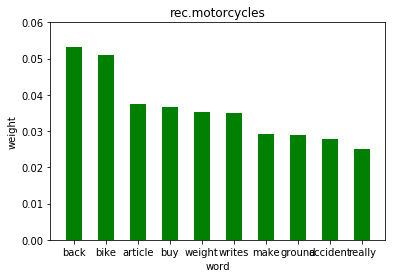

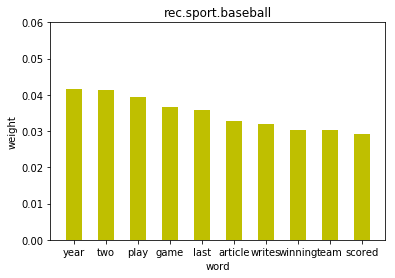

In [55]:
colors = ['r','b','g','y']
# plt.figure()
for i in range(len(weights_dict)):
#     plt.subplot(8,1,(i+1)*2)
    fig = plt.figure(categories[i])
    index = np.arange(len(weights_dict[i]))
    plt.xticks([i for i in range(10)],word_dict[i])
    plt.ylim([0,0.06])
    bar_time = plt.bar(index,weights_dict[i],0.5,color=colors[i])
    plt.xlabel('word')
    plt.ylabel('weight')
    plt.title(categories[i])


In [56]:
time_end = time.time()
print('All time of this project is ',time_end -time_start)

All time of this project is  974.9119007587433
